In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from matplotlib import style
#style.use('fivethirtyeight')
import seaborn as sns
#sns.set(style = 'white', color_code=True)
# import warnings
# warnings.filterwarnings('ignore')
# sns.set_style('whitegrid')

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Performing grid search
# from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [52]:
df = pd.read_csv('train.csv')

In [53]:
df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].str.rstrip('+')
df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(np.int)
df['Married'] = df['Married'].map({'No':0, 'Yes':1}).astype(np.int)
df['Education'] = df['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
df['Dependents'] = df['Dependents'].astype(np.int)
#Property Map
property_map = {'Semiurban':77,'Urban':66,'Rural':62}
df['Property_Area'] = df['Property_Area'].map(property_map)
# test_loan_df['Property_Area']  = test_loan_df['Property_Area'].map(property_map)

In [4]:
# df.isnull().sum()

In [54]:
# dtrain= pd.get_dummies(df)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,66,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,62,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,66,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,66,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,66,1


In [55]:
# df.head()
df['Loan_ID'] = [x[2:] for x in df['Loan_ID']]
# df.head()
# df.info()

In [56]:
#train = dtrain
target = 'Loan_Status'
IDcol = 'Loan_ID'

In [57]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Loan_Status'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Loan_Status'], cv=cv_folds, scoring='roc_auc')
        
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Loan_Status'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Loan_Status'], dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [58]:
dtest = pd.read_csv('test.csv')

In [59]:
dtest['Gender'] = dtest['Gender'].map({'Female':0,'Male':1})
dtest['Married'] = dtest['Married'].map({'No':0, 'Yes':1}).astype(np.int)
dtest['Education'] = dtest['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
dtest['Self_Employed'] = dtest['Self_Employed'].map({'No':0, 'Yes':1})
dtest['Dependents'] = dtest['Dependents'].str.rstrip('+')
dtest['Gender'] = dtest['Gender'].fillna( dtest['Gender'].dropna().mode().values[0]).astype(np.int)
dtest['Dependents'] = dtest['Dependents'].fillna( dtest['Dependents'].dropna().mode().values[0]).astype(np.int)
dtest['Self_Employed'] = dtest['Self_Employed'].fillna( dtest['Self_Employed'].dropna().mode().values[0])
dtest['LoanAmount'] = dtest['LoanAmount'].fillna( dtest['LoanAmount'].dropna().mode().values[0])
dtest['Loan_Amount_Term'] = dtest['Loan_Amount_Term'].fillna( dtest['Loan_Amount_Term'].dropna().mode().values[0])
dtest['Credit_History'] = dtest['Credit_History'].fillna( dtest['Credit_History'].dropna().mode().values[0] )
#Property Map
property_map = {'Semiurban':77,'Urban':66,'Rural':62}
dtest['Property_Area']  = dtest['Property_Area'].map(property_map)

In [60]:
X_test = dtest.iloc[:,1:]
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0.0,5720,0,110.0,360.0,1.0,66
1,1,1,1,1,0.0,3076,1500,126.0,360.0,1.0,66
2,1,1,2,1,0.0,5000,1800,208.0,360.0,1.0,66
3,1,1,2,1,0.0,2340,2546,100.0,360.0,1.0,66
4,1,0,0,0,0.0,3276,0,78.0,360.0,1.0,66



Model Report
Accuracy : 0.8811
AUC Score (Train): 0.963357
CV Score : Mean - 0.7238924 | Std - 0.06673732 | Min - 0.6168929 | Max - 0.818609


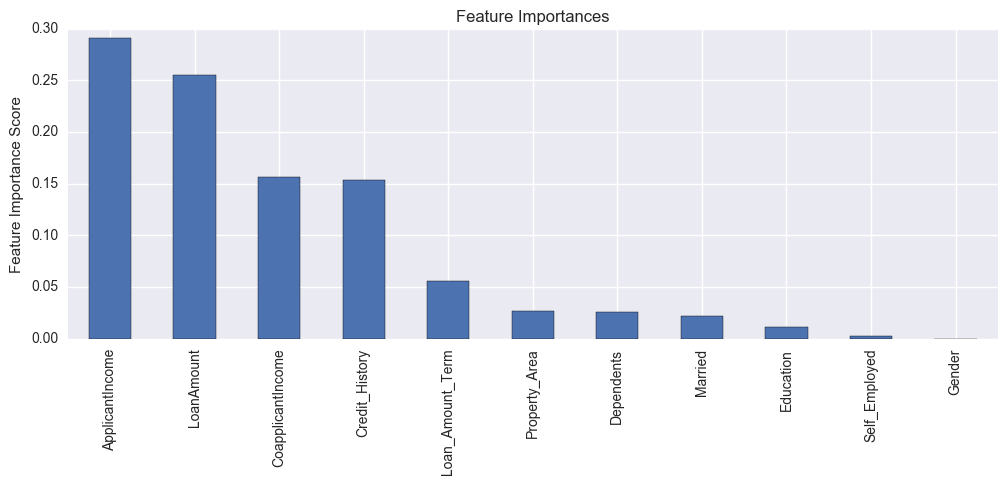

In [61]:
#Choose all predictors except target & IDcols
predictors = [x for x in df.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0,df,predictors)
# gbm0.fit(df[predictors], df['Loan_Status'])
# dtrain_predictions = gbm0.predict(X_test)

In [62]:
clf = GradientBoostingClassifier(learning_rate =0.1,random_state=10,subsample=0.8,n_estimators=60)
param_grid1 = {#'max_depth' : [None, 7,8,9],
              'max_features' : ['sqrt'],
              'n_estimators' : list(range(10,90,10))}
#               'min_samples_split':[50],
#               'min_samples_leaf':[6]}

gsearch1 = GridSearchCV(clf, param_grid= param_grid1) 
predictors = [x for x in df.columns if x not in [target, IDcol]]
gsearch1.fit(df[predictors],df[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.78176, std: 0.01816, params: {'max_features': 'sqrt', 'n_estimators': 10},
  mean: 0.80293, std: 0.01800, params: {'max_features': 'sqrt', 'n_estimators': 20},
  mean: 0.79642, std: 0.01568, params: {'max_features': 'sqrt', 'n_estimators': 30},
  mean: 0.79967, std: 0.01787, params: {'max_features': 'sqrt', 'n_estimators': 40},
  mean: 0.79642, std: 0.00962, params: {'max_features': 'sqrt', 'n_estimators': 50},
  mean: 0.79479, std: 0.00359, params: {'max_features': 'sqrt', 'n_estimators': 60},
  mean: 0.79642, std: 0.00184, params: {'max_features': 'sqrt', 'n_estimators': 70},
  mean: 0.79153, std: 0.00798, params: {'max_features': 'sqrt', 'n_estimators': 80}],
 {'max_features': 'sqrt', 'n_estimators': 20},
 0.80293159609120524)


Model Report
Accuracy : 0.8176
AUC Score (Train): 0.847829
CV Score : Mean - 0.7360223 | Std - 0.03900299 | Min - 0.6782805 | Max - 0.785822


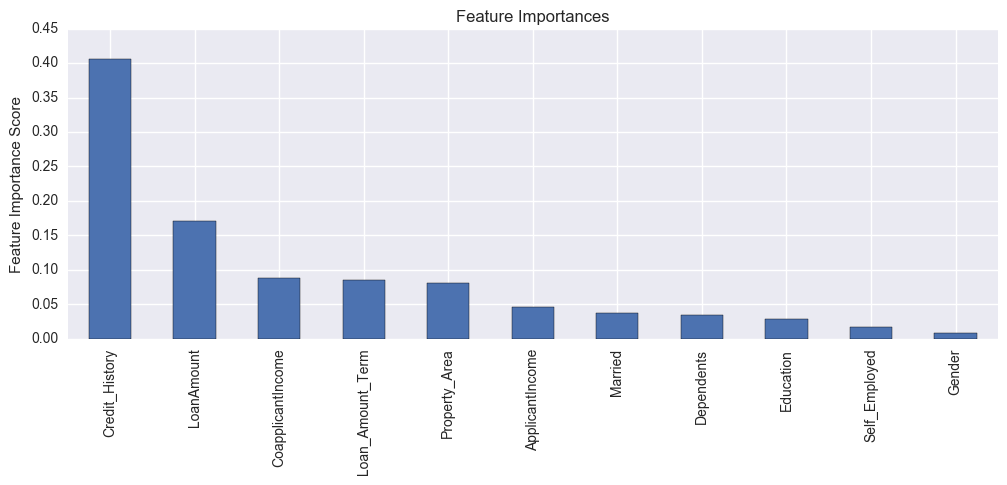

In [63]:
modelfit(gsearch1.best_estimator_, df, predictors)

In [64]:
#On basis of above observation we can set
#n_estimators=20
#max_features=sqrt
clf = GradientBoostingClassifier(learning_rate =0.1,random_state=10,subsample=0.8,n_estimators=20,max_features='sqrt')
param_grid2 = {'max_depth':list(range(1,10,1)), 
               'min_samples_split':list(range(10,100,10)),
               'min_samples_leaf':list(range(5,15,2))
               }

gsearch2 = GridSearchCV(clf, param_grid= param_grid2) 
predictors = [x for x in df.columns if x not in [target, IDcol]]
gsearch2.fit(df[predictors],df[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.76710, std: 0.04326, params: {'min_samples_split': 10, 'max_depth': 1, 'min_samples_leaf': 5},
  mean: 0.76710, std: 0.04326, params: {'min_samples_split': 20, 'max_depth': 1, 'min_samples_leaf': 5},
  mean: 0.76710, std: 0.04326, params: {'min_samples_split': 30, 'max_depth': 1, 'min_samples_leaf': 5},
  mean: 0.76710, std: 0.04326, params: {'min_samples_split': 40, 'max_depth': 1, 'min_samples_leaf': 5},
  mean: 0.76710, std: 0.04326, params: {'min_samples_split': 50, 'max_depth': 1, 'min_samples_leaf': 5},
  mean: 0.76710, std: 0.04326, params: {'min_samples_split': 60, 'max_depth': 1, 'min_samples_leaf': 5},
  mean: 0.76710, std: 0.04326, params: {'min_samples_split': 70, 'max_depth': 1, 'min_samples_leaf': 5},
  mean: 0.76710, std: 0.04326, params: {'min_samples_split': 80, 'max_depth': 1, 'min_samples_leaf': 5},
  mean: 0.76710, std: 0.04326, params: {'min_samples_split': 90, 'max_depth': 1, 'min_samples_leaf': 5},
  mean: 0.76710, std: 0.04326, params: {'min_samples_sp


Model Report
Accuracy : 0.8127
AUC Score (Train): 0.893254
CV Score : Mean - 0.7407559 | Std - 0.04437099 | Min - 0.7020677 | Max - 0.8007519


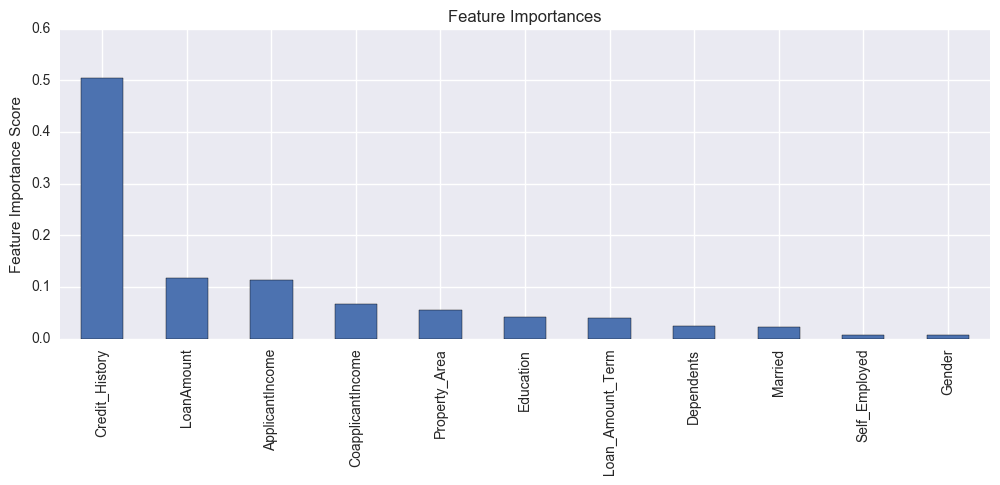

In [65]:
modelfit(gsearch2.best_estimator_, df, predictors)
# modelfit(gbm0,df,predictors)

In [66]:
#On basis of above observation we can set
#max_depth=3
#min_samples_split=50
clf = GradientBoostingClassifier(learning_rate =0.1,random_state=10,subsample=0.8,n_estimators=20,
                                 max_depth=5,min_samples_leaf=13,min_samples_split=50)
param_grid3 = {'max_features':list(range(1,10,1))
               }

gsearch3 = GridSearchCV(clf, param_grid= param_grid3) 
predictors = [x for x in df.columns if x not in [target, IDcol]]
gsearch3.fit(df[predictors],df[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.79316, std: 0.02762, params: {'max_features': 1},
  mean: 0.81107, std: 0.01621, params: {'max_features': 2},
  mean: 0.81270, std: 0.02158, params: {'max_features': 3},
  mean: 0.80293, std: 0.00788, params: {'max_features': 4},
  mean: 0.80619, std: 0.01240, params: {'max_features': 5},
  mean: 0.80293, std: 0.01468, params: {'max_features': 6},
  mean: 0.81107, std: 0.01928, params: {'max_features': 7},
  mean: 0.80945, std: 0.01698, params: {'max_features': 8},
  mean: 0.80619, std: 0.01240, params: {'max_features': 9}],
 {'max_features': 3},
 0.81270358306188928)


Model Report
Accuracy : 0.8127
AUC Score (Train): 0.893254
CV Score : Mean - 0.7407559 | Std - 0.04437099 | Min - 0.7020677 | Max - 0.8007519


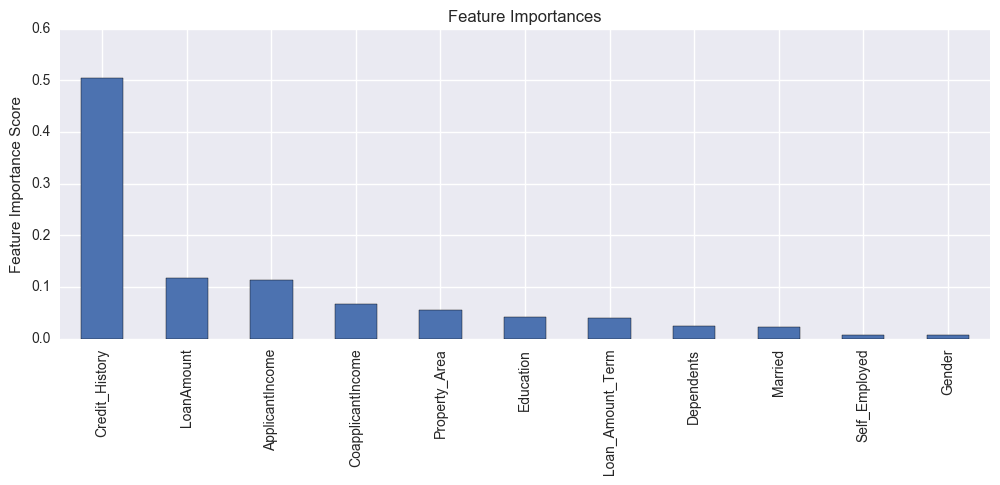

In [67]:
modelfit(gsearch3.best_estimator_, df, predictors)

In [71]:
clf_final = GradientBoostingClassifier(learning_rate =0.05,random_state=10,subsample=0.7,n_estimators=40,max_features='sqrt',
                                 max_depth=5,min_samples_leaf=13,min_samples_split=50)
predictors = [x for x in df.columns if x not in [target, IDcol]]

# modelfit(clf, df, predictors)
clf_final.fit(df[predictors], df['Loan_Status'])
dtrain_predictions = clf_final.predict(X_test)

In [70]:

clf = GradientBoostingClassifier(learning_rate =0.1,random_state=10,subsample=0.8,n_estimators=20,max_features=3,
                                 max_depth=5,min_samples_leaf=13,min_samples_split=50)
param_grid4 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}

gsearch4 = GridSearchCV(clf, param_grid= param_grid4) 
predictors = [x for x in df.columns if x not in [target, IDcol]]
gsearch4.fit(df[predictors],df[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.81107, std: 0.01928, params: {'subsample': 0.6},
  mean: 0.81270, std: 0.01470, params: {'subsample': 0.7},
  mean: 0.80945, std: 0.01698, params: {'subsample': 0.75},
  mean: 0.81270, std: 0.02158, params: {'subsample': 0.8},
  mean: 0.80945, std: 0.01698, params: {'subsample': 0.85},
  mean: 0.80945, std: 0.01698, params: {'subsample': 0.9}],
 {'subsample': 0.7},
 0.81270358306188928)


Model Report
Accuracy : 0.8078
AUC Score (Train): 0.888564
CV Score : Mean - 0.7324402 | Std - 0.04141199 | Min - 0.6804511 | Max - 0.7807018


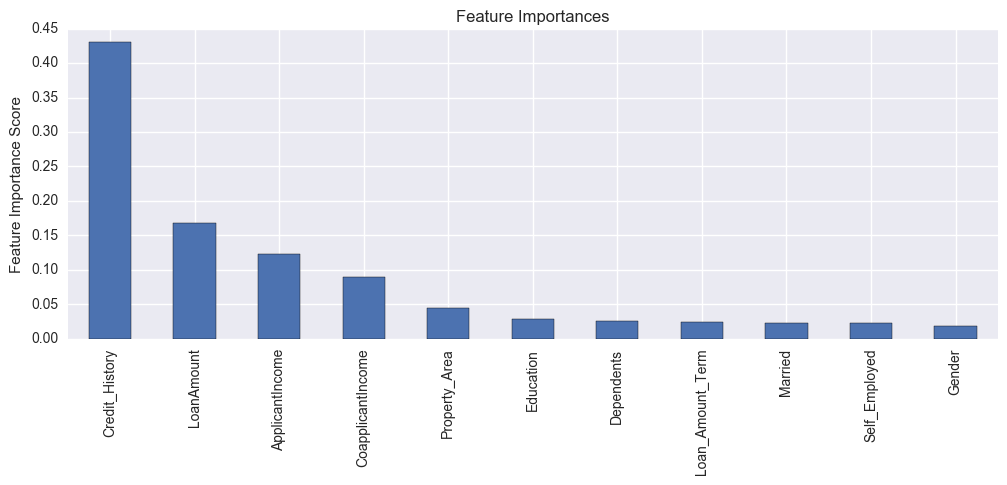

In [72]:
modelfit(gsearch4.best_estimator_, df, predictors)

In [73]:
submission = pd.DataFrame({
        'Loan_ID':dtest['Loan_ID'],
        'Loan_Status':dtrain_predictions
    })
submission.to_csv('Loan_Prediction.csv',index=False)